##### This notebook designed to prepare the plots in Figure 1 and Figure 2 in the paper with title "Distributionally Robust Linear Quadratic Control".

To get data of the results run the following lines. 

    python figure_1.py 
    python figure_2.py

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

def plot_figure(plt, x, y, color="b", label=None, ls="solid", with_shade=True):
    mean_ = np.mean(y, axis=1)
    err_ = np.std(y, axis=1)
    plt.plot(x, mean_, color=color, linewidth=4, linestyle=ls, label=label)
    plt.plot(x, mean_ + err_, color=color, linewidth=3, alpha=0.2)
    plt.plot(x, mean_ - err_, color=color, linewidth=3, alpha=0.2)
    if with_shade:
        plt.fill_between(x, mean_ - err_, mean_ + err_, alpha=0.1, facecolor=color)
        
amb_set = "KL"
replications = 10
n = 10
fw_color = colors["brown"]
mosek_color = colors["gray"]
fw_color_faster = colors["pink"]
plt.rcParams.update({'font.size': 18})
mosek_time = np.load("results-or/computation-time/res_mosek_solver_time_n_{}_{}_set_reps_{}.npy".format(n, amb_set, replications))
fw_time = np.load("results-or/computation-time/res_fw_solver_time_n_{}_{}_set_reps_{}.npy".format(n, amb_set, replications))
mosek_time = mosek_time
fw_time = fw_time
# mosek_time[mosek_time >= 500] = np.nan
# fw_time_faster[fw_time_faster >= 500] = np.nan
base_scale = np.arange(1, 10, 1)
T_range = np.hstack([base_scale, base_scale * 10, 100])

/var/folders/ts/tr3w1xfd6bg4g2lbr7jvbf9h0000gp/T/ipykernel_54898/437299453.py:17: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim([0, 100])


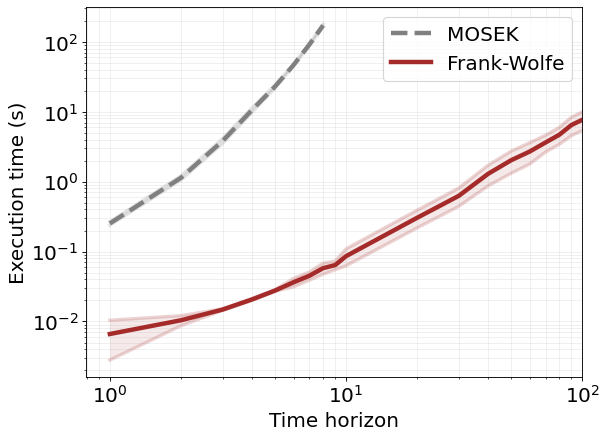

In [15]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plot_figure(ax, T_range, mosek_time, ls="dashed", color=mosek_color, label="MOSEK")
plot_figure(ax, T_range, fw_time, color=fw_color, label="Frank-Wolfe")
# plot_figure(ax, T_range, fw_time_faster, color=fw_color_faster, label="Frank-Wolfe-Diagonalized")

params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'Sharif',
          'text.latex.unicode': True,
          }
plt.grid(True, which="both", alpha=0.2)
plt.ylabel("Execution time (s)")

plt.xlabel("Time horizon")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0, 100])
plt.legend()
plt.show()
fig.savefig(
            "results-or/computation-time/figures/computation_time_{}_n_{}_reps_{}.pdf".format(amb_set, n, replications),
            format="pdf",
    )


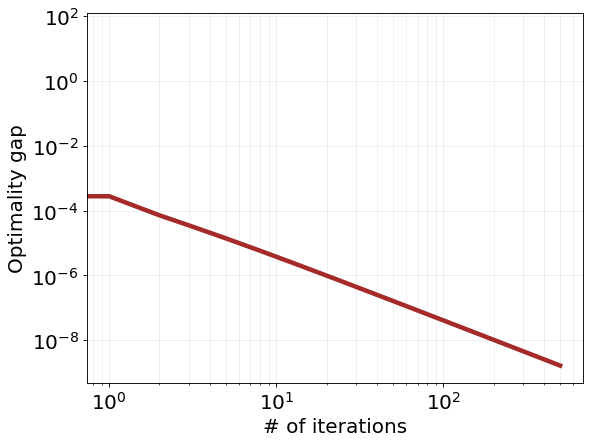

In [10]:
## Now this result will be with without the cut in the linearization oracle


amb_set = "KL"
data = np.load("results-or/duality-gap/converge_{}.npz".format(amb_set))
gap = data["fw_duality_gap"]
x = np.arange(len(gap[:, 0]))
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plot_figure(ax, x, gap, color=fw_color)
ax.set_xscale("log")
ax.set_yscale("log")
plt.grid(True, which="both", alpha=0.2)
plt.ylabel("Optimality gap")
plt.xlabel("# of iterations")
plt.show()
fig.savefig(
            "results-or/duality-gap/duality_gap_{}.pdf".format(amb_set),
            format="pdf",
    )
